# HW 2: Supervised Learning Models

## Part 1: Regression on California Test Scores

In [ ]:
# Loading data
import pandas as pd

df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv")
df.head()

### 1.1 Visualize the univariate distribution of the target feature and each of the three continuous explanatory variables that you think are likely to have a relationship with the target feature.  

In [2]:
from matplotlib import pyplot as plt

df['testscr'].hist()
plt.title("Histogram of test score")
plt.xlabel("test score")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

Text(0, 0.5, 'Count')

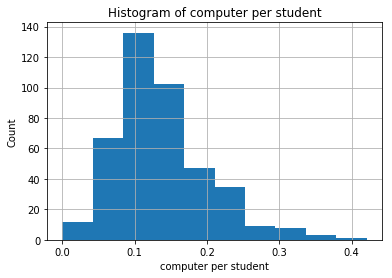

In [3]:
df['compstu'].hist()
plt.title("Histogram of computer per student")
plt.xlabel("computer per student")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

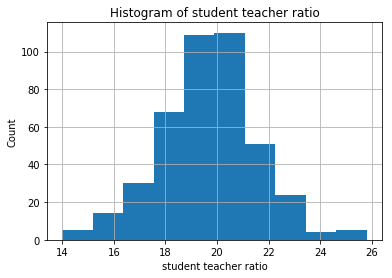

In [4]:
df['str'].hist()
plt.title("Histogram of student teacher ratio")
plt.xlabel("student teacher ratio")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

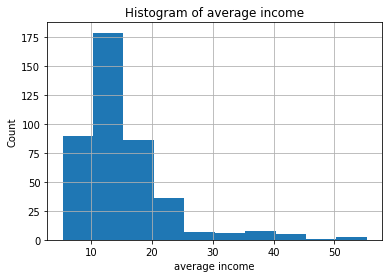

In [5]:
df['avginc'].hist()
plt.title("Histogram of average income")
plt.xlabel("average income")
plt.ylabel("Count")

### 1.2 Visualize the dependency of the target on each feature from 1.1

Text(0, 0.5, 'test score')

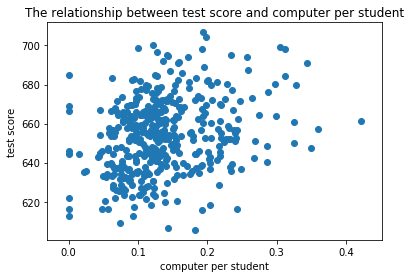

In [6]:
plt.scatter(df['compstu'],df['testscr'])
plt.title("The relationship between test score and computer per student")
plt.xlabel("computer per student")
plt.ylabel("test score")

Text(0, 0.5, 'test score')

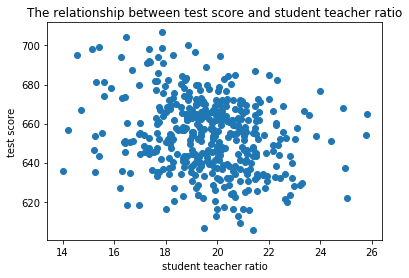

In [7]:
plt.scatter(df['str'],df['testscr'])
plt.title("The relationship between test score and student teacher ratio")
plt.xlabel("student teacher ratio")
plt.ylabel("test score")

Text(0, 0.5, 'test score')

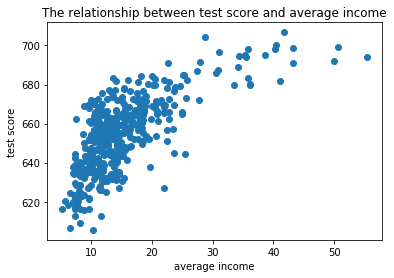

In [8]:
plt.scatter(df['avginc'],df['testscr'])
plt.title("The relationship between test score and average income")
plt.xlabel("average income")
plt.ylabel("test score")

### 1.3 Split data in training and test set. Build models that evaluate the relationship between all available X variables in the California test dataset and the target variable. Evaluate KNN for regression, Linear Regression (OLS), Ridge, and Lasso using cross-validation with the default parameters. Does scaling the data with the StandardScaler help?

In [9]:
# Eliminate none-continuous data
df = df.loc[:,df.columns != 'Unnamed: 0']
df = df.loc[:,df.columns != 'distcod']
df = df.loc[:,df.columns != 'county']
df = df.loc[:,df.columns != 'district']
df = df.loc[:,df.columns != 'grspan']
df = df.loc[:,df.columns != 'readscr']
df = df.loc[:,df.columns != 'mathscr']

# Change all variables to float number
df = pd.DataFrame(df, dtype='float64')

df.head()

,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct
0,195.0,10.900000,0.510200,2.040800,67.0,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000
1,240.0,11.150000,15.416700,47.916698,101.0,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333
2,1550.0,82.900002,55.032299,76.322601,169.0,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002
3,243.0,14.000000,36.475399,77.049202,85.0,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000
4,1335.0,71.500000,33.108601,78.427002,171.0,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677


In [10]:
# Produce y and X variables
y = df['testscr']
X = df.loc[:,df.columns!='testscr']

# Split data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)

### KNN for Regression

In [11]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

print("accuracy: {:.3f}".format(knn.score(X_test, y_test)))

accuracy: -0.133


In [12]:
# Cross Validation without scaling
from sklearn.model_selection import cross_val_score
import numpy as np

print("CV score: {:.3f}".format(np.mean(cross_val_score(KNeighborsRegressor(n_neighbors=5), X_train, y_train, cv=3))))

CV score: -0.122


In [13]:
# Scaling with StandardScaler
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
knn.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)

print("Test set score: {:.3f}".format(knn.score(X_test_scaled, y_test)))
print("CV score: {:.3f}".format(np.mean(cross_val_score(KNeighborsRegressor(n_neighbors=5), X_train_scaled, y_train, cv=3))))

Test set score: 0.733
CV score: 0.696


In [14]:
# Pipeline version
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
pipe.fit(X_train, y_train)

print("Test set score: {:.3f}".format(pipe.score(X_test, y_test)))

Test set score: 0.733


#### (Comment) In KNN, the scaling increased the accuracy so much.

### Linear Regression (OLS)

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)

print("Coefficients: {}".format(lr.coef_))
print("Intercept: {}".format(lr.intercept_))

Coefficients: [ 3.24981802e-05 -5.52477017e-03 -1.61991012e-02 -3.72818434e-01
  2.42039170e-03  8.97514422e+00  1.06557429e-03 -3.41367397e-01
  6.80752800e-01 -2.10937339e-01]
Intercept: 663.3724283900467


In [16]:
# Goodness of Fit
print("Training set score: {:.5f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.5f}".format(lr.score(X_test, y_test)))

Training set score: 0.80233
Test set score: 0.81634


In [17]:
# Cross Validation without scaling
print("CV score: {:.5f}".format(np.mean(cross_val_score(LinearRegression(), X_train, y_train, cv=3))))

CV score: 0.77243


In [18]:
# Scaling with StandardScaler
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
lr = LinearRegression().fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
print("Test set score: {:.5f}".format(lr.score(X_test_scaled, y_test)))
print("CV score: {:.5f}".format(np.mean(cross_val_score(LinearRegression(), X_train_scaled, y_train, cv=3))))

Test set score: 0.81634
CV score: 0.77243


In [19]:
# Pipeline version
pipe = make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(X_train, y_train)
print("Test set score: {:.5f}".format(pipe.score(X_test, y_test)))

Test set score: 0.81634


#### (Comment) In Linear Regression (OLS), the scaling does not affect the scores.

In [20]:
# Appendix: Summary of OLS
import statsmodels.api as sm

X_train_new = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_new).fit()

model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                testscr   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     123.4
Date:                Thu, 10 Oct 2019   Prob (F-statistic):          9.51e-101
Time:                        15:12:30   Log-Likelihood:                -1119.3
No. Observations:                 315   AIC:                             2261.
Df Residuals:                     304   BIC:                             2302.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        663.3724     11.494     57.713      0.000     640.754     685.991
enrltot      3.25e-05      0.002      0.018      0.986      -0.004       0.004
teachers      -0.0055      0.041     -0.136      0.892      -0.085       0.074
calwpct       -0.0162      0.089     -0.183      0.855      -0.191       0.158
mealpct       -0.3728      0.047     -7.915      0.000      -0.466      -0.280
computer       0.0024      0.004      0.598      0.550      -0.006       0.010
compstu        8.9751      9.338      0.961      0.337      -9.400      27.351
expnstu        0.0011      0.001      1.016      0.310      -0.001       0.003
str           -0.3414      0.394     -0.865      0.387      -1.118       0.435
avginc         0.6808      0.105      6.454      0.000       0.473       0.888
elpct         -0.2109      0.043     -4.857      0.000      -0.296      -0.125
==============================================================================
Omnibus:                        7.076   Durbin-Watson:                   1.712
Prob(Omnibus):                  0.029   Jarque-Bera (JB):               11.153
Skew:                          -0.051   Prob(JB):                      0.00379
Kurtosis:                       3.916   Cond. No.                     1.53e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Ridge Regression

In [21]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.5f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.5f}".format(ridge.score(X_test, y_test)))

Training set score: 0.80216
Test set score: 0.81582


In [22]:
# Cross Validation without scaling
print("CV score: {:.5f}".format(np.mean(cross_val_score(Ridge(max_iter=100000), X_train, y_train, cv=3))))

CV score: 0.77298


In [23]:
# Scaling with StandardScaler
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
ridge = Ridge().fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
print("Test set score: {:.5f}".format(ridge.score(X_test_scaled, y_test)))
print("CV score: {:.5f}".format(np.mean(cross_val_score(Ridge(max_iter=100000), X_train_scaled, y_train, cv=3))))

Test set score: 0.81682
CV score: 0.77322


In [24]:
# Pipeline version
pipe = make_pipeline(StandardScaler(), Ridge())
pipe.fit(X_train, y_train)
print("Test set score: {:.5f}".format(pipe.score(X_test, y_test)))

Test set score: 0.81682


#### (Comment) In Ridge Regression, the scaling slightly increased the scores (almost same).

### Lasso Regression

In [25]:
from sklearn.linear_model import Lasso

lasso = Lasso(max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.5f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.5f}".format(lasso.score(X_test, y_test)))

Training set score: 0.80086
Test set score: 0.81608


In [26]:
# Cross Validation without scaling
print("CV score: {:.5f}".format(np.mean(cross_val_score(Lasso(max_iter=100000), X_train, y_train, cv=3))))

CV score: 0.77540


In [27]:
# Scaling with StandardScaler
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
lasso = Lasso(max_iter=100000).fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
print("Test set score: {:.5f}".format(lasso.score(X_test_scaled, y_test)))
print("CV score: {:.5f}".format(np.mean(cross_val_score(Lasso(max_iter=100000), X_train_scaled, y_train, cv=3))))

Test set score: 0.81274
CV score: 0.77580


In [28]:
# Pipeline version
pipe = make_pipeline(StandardScaler(), Lasso(max_iter=100000))
pipe.fit(X_train, y_train)
print("Test set score: {:.5f}".format(pipe.score(X_test, y_test)))

Test set score: 0.81274


#### (Comment) In Lasso Regression, the scaling slightly increased the CV score (almost same).

### 1.4 Tune the parameters of the models where possible using GridSearchCV. Do the results improve?

In [29]:
# KNN for regression
from sklearn.model_selection import GridSearchCV

knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
param_grid = {'kneighborsregressor__n_neighbors': range(1, 30)}
grid = GridSearchCV(knn_pipe, param_grid, cv=3)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.5f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.5f}".format(grid.score(X_test, y_test)))

best mean cross-validation score: 0.71578
best parameters: {'kneighborsregressor__n_neighbors': 12}
test-set score: 0.73185


In [30]:
# Ridge regression
ridge_pipe = make_pipeline(StandardScaler(), Ridge(max_iter=100000))
param_grid = {'ridge__alpha': range(1, 30)}
grid = GridSearchCV(ridge_pipe, param_grid, cv=3)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.5f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.5f}".format(grid.score(X_test, y_test)))

best mean cross-validation score: 0.77575
best parameters: {'ridge__alpha': 16}
test-set score: 0.81885


In [31]:
# Lasso regression
lasso_pipe = make_pipeline(StandardScaler(), Lasso(max_iter=100000))
param_grid = {'lasso__alpha': range(1, 30)}
grid = GridSearchCV(lasso_pipe, param_grid, cv=3)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.5f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.5f}".format(grid.score(X_test, y_test)))

best mean cross-validation score: 0.77554
best parameters: {'lasso__alpha': 1}
test-set score: 0.81274


#### (Comment) Since KNN and Ridge model changed the parameters (k=12, alpha=16), the scores improved.

### 1.5 Compare coefficients of two best linear models (not knn), do they agree on which features are important?

In [32]:
# Ridge Regression
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
ridge = Ridge(max_iter=10000, alpha=16).fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)

print("Intercept: {}".format(ridge.intercept_))
print("Coefficients: {}".format(ridge.coef_))

print("Test set score: {:.5f}".format(ridge.score(X_test_scaled, y_test)))
print("CV score: {:.5f}".format(np.mean(cross_val_score(Ridge(max_iter=10000), X_train_scaled, y_train, cv=3))))

Intercept: 655.3471445234994
Coefficients: [-0.28701349 -0.24681299 -1.0678237  -8.44129304  0.79017877  0.62386441
  0.71770962 -0.68012374  5.09184762 -4.3037545 ]
Test set score: 0.81885
CV score: 0.77322


In [33]:
# Lasso Regression
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
lasso = Lasso(max_iter=10000, alpha=1).fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)

print("Intercept: {}".format(lasso.intercept_))
print("Coefficients: {}".format(lasso.coef_))

print("Test set score: {:.5f}".format(lasso.score(X_test_scaled, y_test)))
print("CV score: {:.5f}".format(np.mean(cross_val_score(Lasso(max_iter=10000), X_train_scaled, y_train, cv=3))))

Intercept: 655.3471445234994
Coefficients: [-0.         -0.         -0.         -9.95164278 -0.          0.24638937
  0.30234117 -0.16881025  4.64120416 -3.21395419]
Test set score: 0.81274
CV score: 0.77580


In [34]:
coef_r = pd.DataFrame(ridge.coef_, index=X.columns, columns={'Ridge Coef.'})
coef_l = pd.DataFrame(lasso.coef_, index=X.columns, columns={'Lasso Coef.'})
coef = pd.concat([coef_r, coef_l], axis=1)
print(coef)

          Ridge Coef.  Lasso Coef.
enrltot     -0.287013    -0.000000
teachers    -0.246813    -0.000000
calwpct     -1.067824    -0.000000
mealpct     -8.441293    -9.951643
computer     0.790179    -0.000000
compstu      0.623864     0.246389
expnstu      0.717710     0.302341
str         -0.680124    -0.168810
avginc       5.091848     4.641204
elpct       -4.303755    -3.213954


#### (Comment) In Lasso Regression, the coefficients of "enrltot", "teachers", "calwpct", "computer" were eliminated. But, in Ridge Regression, these variables were still estimated. The largest coefficient is "avginc" and the smallest coefficient is "mealpct", which both models agree with.

### 1.6 Discuss which final model you would choose to predict new data

In [35]:
# Lasso Regression
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
lasso = Lasso(max_iter=10000, alpha=1).fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)

coef_l = pd.DataFrame(lasso.coef_, index=X.columns, columns={'Lasso Coef.'})
print(coef_l)

print("Test set score: {:.5f}".format(lasso.score(X_test_scaled, y_test)))
print("CV score: {:.5f}".format(np.mean(cross_val_score(Lasso(max_iter=10000), X_train_scaled, y_train, cv=3))))

          Lasso Coef.
enrltot     -0.000000
teachers    -0.000000
calwpct     -0.000000
mealpct     -9.951643
computer    -0.000000
compstu      0.246389
expnstu      0.302341
str         -0.168810
avginc       4.641204
elpct       -3.213954
Test set score: 0.81274
CV score: 0.77580


#### (Comment) Since this model (Lasso, alpha=1, scaling) has the largest CV score, I would choose it to predict new data.

## Part 2: Classification on red and white wine characteristics

In [2]:
# Loarding data set
import pandas as pd
df_red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
df_white = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

# Adding binary column
df_red['winetype'] = 1
df_white['winetype'] = 0

In [37]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [38]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [3]:
# Combining data set
df_wine = pd.concat([df_red, df_white])

# Change all variables to float number
df_wine = pd.DataFrame(df_wine, dtype='float64')

### 2.1 Visualize the univariate distribution of the target feature and each of the three explanatory variables that you think are likely to have a relationship with the target feature

Text(0, 0.5, 'Count')

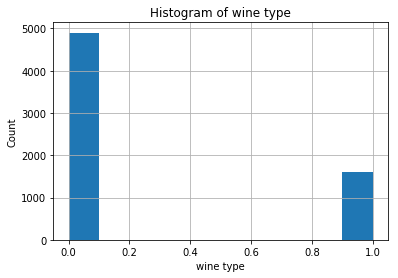

In [40]:
df_wine['winetype'].hist()
plt.title("Histogram of wine type")
plt.xlabel("wine type")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

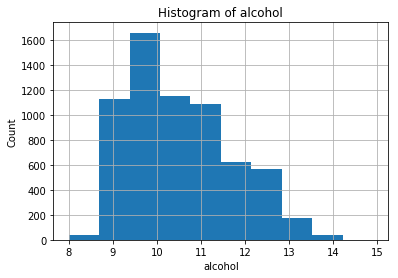

In [41]:
df_wine['alcohol'].hist()
plt.title("Histogram of alcohol")
plt.xlabel("alcohol")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

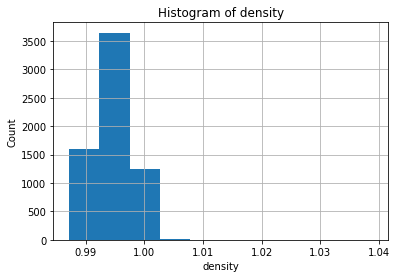

In [42]:
df_wine['density'].hist()
plt.title("Histogram of density")
plt.xlabel("density")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

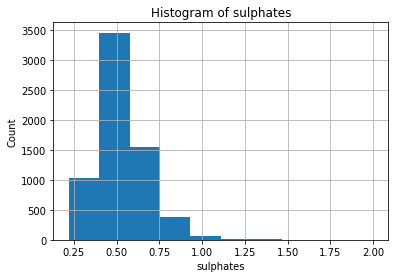

In [43]:
df_wine['sulphates'].hist()
plt.title("Histogram of sulphates")
plt.xlabel("sulphates")
plt.ylabel("Count")

### 2.2 Split data into training and test set. Build models that evaluate the relationship between all available X variables in the dataset and the target variable. Evaluate Logistic Regression, Penalized Logistic Regression, and KNN for classification using cross-validation. How different are the results? How does scaling the data with StandardScaler influence the results?

In [4]:
# Produce y and X variables
y = df_wine['winetype']
X = df_wine.loc[:,df_wine.columns!='winetype']

# Split data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)

### Logistic Regression (Ridge)

#### *Since we cannot execute the logistic regression without any penalties (ValueError: Logistic Regression supports only penalties in ['l1', 'l2'], got none), I defined the ridge model (default, penalty='l2') as logistic regression.

In [5]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e90, solver='lbfgs', max_iter=10000).fit(X_train, y_train)

print("logreg.coef_: {}".format(logreg.coef_))

predicted_vals = logreg.predict(X_test)
print("logreg.predict: {}".format(predicted_vals))

logreg.coef_: [[  1.54420004  11.46981625  -1.17785876  -0.12728819  35.07867111
    0.05001327  -0.06362645 -21.25794886   9.42294364   9.14723025
   -0.33624931   0.07796632]]
logreg.predict: [0. 1. 0. ... 0. 0. 1.]


In [6]:
print("Training set score: {:.5f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.5f}".format(logreg.score(X_test, y_test)))

Training set score: 0.98789
Test set score: 0.99077


In [8]:
import numpy as np
# Cross Validation without scaling
print("CV score: {:.5f}".format(np.mean(cross_val_score(
    LogisticRegression(C=1e90, solver='lbfgs', max_iter=10000), X_train, y_train, cv=3))))

NameError: name 'cross_val_score' is not defined

In [48]:
# Cross Validation with scaling
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
logistic = LogisticRegression(C=1e90, penalty='l2', solver='lbfgs', max_iter=10000).fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)

print("Test set score: {:.5f}".format(logistic.score(X_test_scaled, y_test)))
print("CV score: {:.5f}".format(np.mean(cross_val_score(
    LogisticRegression(C=1e90, solver='lbfgs', max_iter=10000), X_train_scaled, y_train, cv=3))))

Test set score: 0.99569
CV score: 0.99282


#### (Comment) In Ridge Logstic Regression, the scaling increased the scores.

### Penalized Logistic Regression (Lasso)

In [49]:
logreg = LogisticRegression(C=1e90, penalty='l1', solver='saga', max_iter=10000).fit(X_train, y_train)

print("logreg.coef_: {}".format(logreg.coef_))

predicted_vals = logreg.predict(X_test)
print("logreg.predict: {}".format(predicted_vals))

logreg.coef_: [[ 0.67995446  3.6462696  -0.87757154 -0.16105755  0.54222734  0.03877593
  -0.06266625 -0.16660483  1.99027734  2.6605346  -0.80105697 -0.19990958]]
logreg.predict: [0. 1. 0. ... 0. 0. 1.]


In [50]:
print("Training set score: {:.5f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.5f}".format(logreg.score(X_test, y_test)))

Training set score: 0.96983
Test set score: 0.96862


In [51]:
# Cross Validation without scaling
print("CV score: {:.5f}".format(np.mean(
    cross_val_score(LogisticRegression(C=1e90, penalty='l1', solver='saga', max_iter=10000), X_train, y_train, cv=3))))

CV score: 0.96757


In [52]:
# Cross Validation with scaling
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
logistic = LogisticRegression(C=1e90, penalty='l1', solver='saga', max_iter=10000).fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)

print("Test set score: {:.5f}".format(logistic.score(X_test_scaled, y_test)))
print("CV score: {:.5f}".format(np.mean(cross_val_score(
    LogisticRegression(C=1e90, penalty='l1', solver='saga', max_iter=10000), X_train_scaled, y_train, cv=3))))

Test set score: 0.99569
CV score: 0.99261


#### (Comment) In Lasso Logstic Regression, the scaling increased the scores as well.

### KNN for Classification

In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

print("accuracy: {:.5f}".format(knn.score(X_test, y_test)))
y_pred = knn.predict(X_test)
print(y_pred)

accuracy: 0.93908
[0. 1. 0. ... 0. 0. 1.]


In [54]:
# Cross Validation without scaling
print("CV score: {:.5f}".format(np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=5), X_train, y_train, cv=3))))

CV score: 0.94438


In [55]:
# Cross Validation with scaling
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)

print("Test set score: {:.5f}".format(knn.score(X_test_scaled, y_test)))
print("CV score: {:.5f}".format(np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=5), X_train_scaled, y_train, cv=3))))

Test set score: 0.99200
CV score: 0.99241


#### (Comment) In KNN, the scaling increased the scores as well. Overall, Logistic Regressions have better CV scores than KNN.

### 2.3 Tune the parameters where possible using GridSearchCV. Do the results improve?

In [9]:
# Logistic Regression (Ridge)
logr_pipe = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs', max_iter=10000))
param_grid = {'logisticregression__C': range(1, 30)}
grid = GridSearchCV(logr_pipe, param_grid, cv=3)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.5f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.5f}".format(grid.score(X_test, y_test)))

NameError: name 'make_pipeline' is not defined

In [57]:
# Penalized Logistic Regression (Lasso)
knn_pipe = make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', solver='saga', max_iter=10000))
param_grid = {'logisticregression__C': range(1, 30)}
grid = GridSearchCV(knn_pipe, param_grid, cv=3)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.5f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.5f}".format(grid.score(X_test, y_test)))

best mean cross-validation score: 0.99323
best parameters: {'logisticregression__C': 2}
test-set score: 0.99569


In [58]:
# KNN for Classification
knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
param_grid = {'kneighborsclassifier__n_neighbors': range(1, 30)}
grid = GridSearchCV(knn_pipe, param_grid, cv=3)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.5f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.5f}".format(grid.score(X_test, y_test)))

best mean cross-validation score: 0.99384
best parameters: {'kneighborsclassifier__n_neighbors': 10}
test-set score: 0.99138


#### (Comment) In both models, the CV score improved by finding best parameters(C=8, 2 & k=10).

### 2.4 Change the cross-validation strategy in GridSearchCV from ‘stratified k-fold’ to ‘kfold’ with shuffling. Do the parameters for models that can be tuned change? Do they change if you change the random seed of the shuffling? Or if you change the random state of the split into training and test data?

In [59]:
# Stratified k-fold
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=3, random_state=10)

knn_pipe = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs', max_iter=10000))
param_grid = {'logisticregression__C': range(1, 20)}
grid = GridSearchCV(knn_pipe, param_grid, cv=skfold)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.5f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {}".format(grid.score(X_test, y_test)))

best mean cross-validation score: 0.99323
best parameters: {'logisticregression__C': 8}
test-set score: 0.9956923076923077


In [60]:
# Kfold with shuffling
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3, shuffle=True, random_state=10)

knn_pipe = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs', max_iter=10000))
param_grid = {'logisticregression__C': range(1, 20)}
grid = GridSearchCV(knn_pipe, param_grid, cv=kfold)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.5f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {}".format(grid.score(X_test, y_test)))

best mean cross-validation score: 0.99323
best parameters: {'logisticregression__C': 3}
test-set score: 0.9944615384615385


#### (Comment) The change in CV methods changed the best parameter C (8 to 3).

In [61]:
# Kfold with shuffling
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)
kfold = KFold(n_splits=3, shuffle=True, random_state=50)

knn_pipe = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs', max_iter=10000))
param_grid = {'logisticregression__C': range(1, 20)}
grid = GridSearchCV(knn_pipe, param_grid, cv=kfold)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.5f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {}".format(grid.score(X_test, y_test)))

best mean cross-validation score: 0.99384
best parameters: {'logisticregression__C': 10}
test-set score: 0.9956923076923077


#### (Comment) The change in the random seed of the shuffling also changed the best parameter C (3 to 10).

In [62]:
# Kfold with shuffling
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)
kfold = KFold(n_splits=3, shuffle=True, random_state=50)

knn_pipe = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs', max_iter=10000))
param_grid = {'logisticregression__C': range(1, 20)}
grid = GridSearchCV(knn_pipe, param_grid, cv=kfold)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.5f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {}".format(grid.score(X_test, y_test)))

best mean cross-validation score: 0.99425
best parameters: {'logisticregression__C': 7}
test-set score: 0.9926153846153846


#### (Comment)  The change in the random state of the split into training and test data also changed the best parameter C (10 to 7).

### 2.5 Lastly, compare the coefficients for Logistic Regression and Penalized Logistic Regression and discuss which final model you would choose to predict new data.

In [63]:
# Logistic Regression (Ridge, C=8)
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
logistic_r = LogisticRegression(C=8, penalty='l2', solver='lbfgs', max_iter=10000).fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)

print("Intercept: {}".format(logistic_r.intercept_))
print("Coefficients: {}".format(logistic_r.coef_))

print("Test set score: {:.5f}".format(logistic_r.score(X_test_scaled, y_test)))
print("CV score: {:.5f}".format(np.mean(cross_val_score(
    LogisticRegression(C=8, penalty='l2', solver='lbfgs', max_iter=10000), X_train_scaled, y_train, cv=3))))

Intercept: [-4.46166385]
Coefficients: [[ 0.36461485  1.48700816 -0.21697031 -4.20746424  0.79790613  0.9485012
  -2.90365517  4.08102963  0.19653249  0.78902853  1.50390532  0.35741976]]
Test set score: 0.99262
CV score: 0.99384


In [64]:
# Penalized Logistic Regression (Lasso, C=2)
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
logistic_l = LogisticRegression(C=2, penalty='l1', solver='saga', max_iter=10000).fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)

print("Intercept: {}".format(logistic_l.intercept_))
print("Coefficients: {}".format(logistic_l.coef_))

print("Test set score: {:.5f}".format(logistic_l.score(X_test_scaled, y_test)))
print("CV score: {:.5f}".format(np.mean(cross_val_score(
    LogisticRegression(C=2, penalty='l1', solver='saga', max_iter=10000), X_train_scaled, y_train, cv=3))))

Intercept: [-4.40964845]
Coefficients: [[ 0.27890505  1.46000066 -0.19960046 -4.21241739  0.76933362  0.91618591
  -2.86104415  4.14334881  0.15510561  0.76495297  1.51150143  0.35078488]]
Test set score: 0.99262
CV score: 0.99405


In [65]:
coef_lr = pd.DataFrame(logistic_r.coef_, index={'Ridge Coef.'}, columns=X.columns)
coef_ll = pd.DataFrame(logistic_l.coef_, index={'Lasso Coef.'}, columns=X.columns)
coef = pd.concat([coef_lr, coef_ll])
coef

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Ridge Coef.,0.364615,1.487008,-0.21697,-4.207464,0.797906,0.948501,-2.903655,4.081030,0.196532,0.789029,1.503905,0.357420
Lasso Coef.,0.278905,1.460001,-0.19960,-4.212417,0.769334,0.916186,-2.861044,4.143349,0.155106,0.764953,1.511501,0.350785


#### (Comment)  There are not so much differences among the coefficients of two models. Since Lasso model has a little higher the CV score, I would choose Lasso model to predict new data.